In [1]:
from pylab import *
%matplotlib inline

# 1

Se tiene la ecuación de movimiento del oscilador armónico, la cual es

$$
\vec F = -k \vec r + \vec f_{fric}
$$

lo cual se puede ver también como

$$
\frac{\delta^2 \vec r}{\delta t^2} = - \frac{k}{m} \vec r + \vec f_{fric}
$$

Lo cual nos lleva al siguiente sistema de ecuaciones

$$
\vec u = \frac{\delta \vec r}{\delta t}
$$
$$
\frac{\delta \vec u}{\delta t} = - \frac{k}{m} \vec r + \vec f_{fric}
$$

donde $ \vec f_{fric}$ es

$$
\vec f_{fric} = - \gamma \vec v
$$

si $\lvert \vec v \lvert < 1$. Por otro lado, cuando $\lvert \vec v \lvert > 1$ la fricción vale

$$
\vec f_{fric} = - \mu  v^{3/2} \hat v = - \mu  v^{1/2} \vec v
$$

Entonces las ecuaciones de movimiento en cartesianas son:

In [74]:
def oscilador_c(r_v,t,fric,k_g_mu):
    dx = r_v[2]
    dy = r_v[3]
    
    if fric==0:
        dvx = -k_g_mu[0]*r_v[0]
        dvy = -k_g_mu[0]*r_v[1]
        
    else:
        dvx = -k_g_mu[0]*r_v[0] + fric(r_v[2],r_v[3],k_g_mu)[0]
        dvy = -k_g_mu[0]*r_v[1] + fric(r_v[2],r_v[3],k_g_mu)[1]
        
    return array([dx,dy,dvx,dvy])

In [82]:
def fric1_c(vx,vy,k_g_mu):
    return array([-k_g_mu[1]*vx,-k_g_mu[1]*vy])

def fric2_c(vx,vy,k_g_mu):
    v = (vx**2 + vy**2)**(0.5)
    f1 = -k_g_mu[2]*v*vx
    f2 = -k_g_mu[2]*v*vy
    return array([f1,f2])
    

Y en polares:

In [125]:
def oscilador_p(r_v,t,fric,k_g_mu):
    dr = r_v[1]

    if fric==0:
        dvr = -k_g_mu[0]*r_v[0]
        
    else:
        dvr = -k_g_mu[0]*r_v[0] + fric(r_v[1],k_g_mu)
        
    return array([dr,dvr])

In [173]:
def fric1_p(vr,k_g_mu):
    return -k_g_mu[1]*vr

def fric2_p(vr,k_g_mu):
    f = -k_g_mu[2]*(vr**(3/2))
    return f
    

Para resolver esto usaremos el integrador RK4 con argumentos

In [128]:
def rk4(ec,p_ini,x,args=0,h=0.0001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

In [174]:
def ecp1(r_v,t,k_g_mu):
    return oscilador_p(r_v,t,fric1_p,k_g_mu)

def ecp2(r_v,t,k_g_mu):
    return oscilador_p(r_v,t,fric2_p,k_g_mu)

In [203]:
def oscilacion(p,N,k_g_mu):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = p
    mi_dt = .1

    for i in range(N-1):

        if abs(trayectoria[i,:][1]) < 1:
            t,sol = rk4(ecp1,trayectoria[i,:],[0,mi_dt],k_g_mu)
            trayectoria[i+1,:] = sol[-1,:]
            
        else:
            t,sol = rk4(ecp2,trayectoria[i,:],[0,mi_dt],k_g_mu)
            trayectoria[i+1,:] = sol[-1,:]
            
    return trayectoria

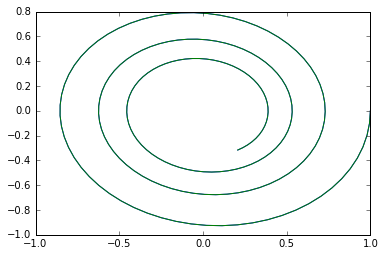

In [266]:
osc1 = oscilacion([1,0],200,[1,0.1,0.2])
osc2 = oscilacion([1,0],200,[1,0.1,0])
#print osc
plot(osc1[:,0],osc1[:,1],osc2[:,0],osc2[:,1])

In [267]:
for i in arange(200):
    E1[i] = (0.5)*osc1[i,1]**2 + 0.5*osc1[i,0]**2
    E2[i] = (0.5)*osc2[i,1]**2 + 0*osc2[i,0]**2
#print E1
#plot[osc1[:,0],E1,osc2[:,0],E2]

IndexError: index 100 is out of bounds for axis 0 with size 100

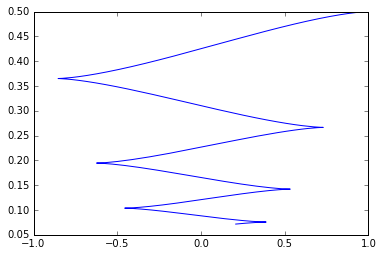

In [268]:
plot(osc1[:,0],(0.5)*osc1[:,1]**2 + 0.5*osc1[:,0]**2)

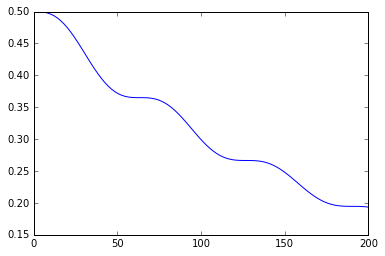

In [269]:
x = linspace(0,200,100)
plot(x,E1)

In [198]:
a = oscilacion([2,0],50,[1,0.1,0])
print a

[[ 2.          0.        ]
 [ 1.99004155 -0.19867182]
 [ 1.96039743 -0.39339165]
 [ 1.91155825 -0.58226293]
 [ 1.84420056 -0.76346613]
 [ 1.75917826 -0.93527604]
 [ 1.65751242 -1.09607801]
 [ 1.54037938 -1.24438291]
 [ 1.40909758 -1.37884064]
 [ 1.26511297 -1.49825223]
 [ 1.10998344 -1.60158021]
 [ 0.94536216 -1.68795736]
 [ 0.7729802  -1.75669357]
 [ 0.59462861 -1.80728101]
 [ 0.41213991 -1.83939733]
 [ 0.22736957 -1.85290703]
 [ 0.04217724 -1.84786093]
 [-0.14159172 -1.82449383]
 [-0.32212445 -1.78322034]
 [-0.49765834 -1.72462898]
 [-0.66649797 -1.64947456]
 [-0.82703138 -1.55866906]
 [-0.97774522 -1.453271  ]
 [-1.1172388  -1.33447343]
 [-1.24423695 -1.20359074]
 [-1.35760139 -1.0620444 ]
 [-1.45634073 -0.91134776]
 [-1.53961884 -0.75309006]
 [-1.60676161 -0.58891993]
 [-1.65726208 -0.42052835]
 [-1.69078377 -0.24963145]
 [-1.70716234 -0.0779532 ]
 [-1.70640554  0.09279183]
 [-1.6886914   0.26091539]
 [-1.65436476  0.4247721 ]
 [-1.60393218  0.58277538]
 [-1.53805532  0.73341262]
 

In [99]:
zeros((10,2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [63]:
a=fric2(1,1,[1,0.1,0.2])
print a

[-0.28284271 -0.28284271]


In [70]:
a=oscilador([1,2,3,4],1,fric2,[1,0.1,0.2])
print a

[ 3.  4. -4. -6.]


In [4]:
a=array([1,2,3])
print a

[1 2 3]


In [56]:
3**2

9

In [108]:
p = [1,1]
N = 5
a=trayectoria = zeros((N,len(p)))
print a

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [215]:
print arange(100)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [226]:
print linspace(1,100)

[   1.            3.02040816    5.04081633    7.06122449    9.08163265
   11.10204082   13.12244898   15.14285714   17.16326531   19.18367347
   21.20408163   23.2244898    25.24489796   27.26530612   29.28571429
   31.30612245   33.32653061   35.34693878   37.36734694   39.3877551
   41.40816327   43.42857143   45.44897959   47.46938776   49.48979592
   51.51020408   53.53061224   55.55102041   57.57142857   59.59183673
   61.6122449    63.63265306   65.65306122   67.67346939   69.69387755
   71.71428571   73.73469388   75.75510204   77.7755102    79.79591837
   81.81632653   83.83673469   85.85714286   87.87755102   89.89795918
   91.91836735   93.93877551   95.95918367   97.97959184  100.        ]
